In [1]:
import pandas as pd
import prisma_ml as prisma
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import pickle
from sklearn.metrics import classification_report, roc_auc_score
import mlflow
import mlflow.sklearn
from xgboost import XGBClassifier
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split 

In [2]:
df = pd.read_csv(r"../../data/processed/emotet_static.csv")

## EDA

In [3]:
info = prisma.DatasetInformation(df)

df.drop_duplicates(inplace=True)

info.dataframe_summary()

### Shape:

(79646, 32)

### Columns and Metadata:

,Data Type,Null Values,Percentage of Nulls
Duration,float64,0,0.0
Source Port,int64,0,0.0
Destination Port,int64,0,0.0
Protocol,object,0,0.0
Flags,object,0,0.0
Packets,int64,0,0.0
Bytes,int64,0,0.0
Mean Payload Size,float64,0,0.0
Std Payload Size,float64,0,0.0
Min Payload Size,int64,0,0.0


### Duplicated Rows:

,Duplicated Rows Count
Total,0


### Categorical

In [4]:
info = prisma.DatasetInformation(df)

info.categorical_summary()

### Categorical Columns Summary:

,Column,Unique Values Count,Top Value,Top Value Percentage
0,Protocol,4,TCP,76.17%
1,Flags,14,SYN,51.50%
2,Label,2,Benign,53.87%
3,direction,1,outbound,100.00%


### Column: Protocol

#### Value Counts and Percentage Distribution:

,Value,Count,Percentage
0,TCP,60663,76.165784
1,HTTP,14216,17.848982
2,DATA-TEXT-LINES,4743,5.955101
3,XML,24,0.030133


---

### Column: Flags

#### Value Counts and Percentage Distribution:

,Value,Count,Percentage
0,SYN,41015,51.496623
1,"PSH,ACK",18926,23.762650
2,"FIN,SYN,ACK",9294,11.669136
3,"SYN,RST,ACK",6277,7.881124
4,"FIN,SYN,RST,ACK",2958,3.713934
5,"FIN,SYN,PSH,ACK",556,0.698089
6,"SYN,ACK",289,0.362856
7,"FIN,SYN,RST,PSH,ACK",119,0.149411
8,"SYN,RST",64,0.080356
9,"SYN,PSH,ACK",53,0.066544


---

### Column: Label

#### Value Counts and Percentage Distribution:

,Value,Count,Percentage
0,Benign,42907,53.872134
1,Emotet,36739,46.127866


---

### Column: direction

#### Value Counts and Percentage Distribution:

,Value,Count,Percentage
0,outbound,79646,100.000000


---

### Numerical

### Numerical Columns Statistical Summary:

,Duration,Source Port,Destination Port,Packets,Bytes,Mean Payload Size,Std Payload Size,Min Payload Size,Max Payload Size,Mean Entropy,...,Is Encrypted Traffic,Common Port Usage,flags_count,syn_count,ack_count,fin_count,is_http,is_internal_ip,short_duration,single_packet
Mean,0.467493,0.496986,0.502859,0.464850,0.499128,0.502934,0.497981,0.472446,0.501745,0.503062,...,0.0,0.009065,0.365358,0.761633,0.484218,0.163034,0.178490,0.756786,0.256661,0.252216
Median,0.501890,0.493327,0.383383,0.516016,0.313814,0.488989,0.485485,0.501001,0.438438,0.506208,...,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
Mode,0.000000,0.124124,0.383383,0.516016,0.313814,0.488989,0.485485,0.501001,0.438438,0.712212,...,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
Std Dev,0.329744,0.287953,0.218906,0.309829,0.274375,0.269720,0.261787,0.312769,0.248413,0.289131,...,0.0,0.094779,0.386657,0.426088,0.499754,0.369399,0.382927,0.429026,0.436793,0.434287
Variance,0.108731,0.082917,0.047920,0.095994,0.075282,0.072749,0.068533,0.097825,0.061709,0.083597,...,0.0,0.008983,0.149504,0.181551,0.249754,0.136456,0.146633,0.184063,0.190788,0.188605
Range,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Correlation Matrix:

,Duration,Source Port,Destination Port,Packets,Bytes,Mean Payload Size,Std Payload Size,Min Payload Size,Max Payload Size,Mean Entropy,...,Is Encrypted Traffic,Common Port Usage,flags_count,syn_count,ack_count,fin_count,is_http,is_internal_ip,short_duration,single_packet
Duration,1.000000,0.072856,-0.135111,0.865994,-0.350048,-0.787693,0.193245,-0.774146,-0.717348,-0.548625,...,NaN,-0.086680,-0.014914,0.757589,-0.196720,0.350979,-0.622390,0.136569,-0.825312,-0.823379
Source Port,0.072856,1.000000,-0.722467,0.144124,-0.172319,0.046749,0.072710,0.079507,0.034200,-0.070999,...,NaN,-0.165078,-0.485541,0.281489,-0.490888,-0.427496,-0.105991,0.742597,-0.262524,-0.252628
Destination Port,-0.135111,-0.722467,1.000000,-0.250040,0.089713,-0.079700,-0.198253,-0.076455,-0.091738,0.030543,...,NaN,0.139973,0.549824,-0.336572,0.563517,0.476321,0.119575,-0.979387,0.306797,0.306355
Packets,0.865994,0.144124,-0.250040,1.000000,-0.258447,-0.829112,0.261628,-0.851431,-0.706323,-0.619387,...,NaN,-0.011993,-0.008650,0.829566,-0.208662,0.364708,-0.688809,0.238923,-0.858050,-0.871349
Bytes,-0.350048,-0.172319,0.089713,-0.258447,1.000000,0.493377,0.096275,0.359742,0.731772,0.451955,...,NaN,0.076765,0.521763,-0.718942,0.621759,-0.133413,0.568315,-0.113847,0.608093,0.609169
Mean Payload Size,-0.787693,0.046749,-0.079700,-0.829112,0.493377,1.000000,-0.146637,0.953771,0.918567,0.719936,...,NaN,-0.001450,-0.186935,-0.779375,0.015943,-0.608726,0.629614,0.073590,0.775775,0.784647
Std Payload Size,0.193245,0.072710,-0.198253,0.261628,0.096275,-0.146637,1.000000,-0.252431,0.030955,-0.203053,...,NaN,0.040058,0.134391,0.115454,0.100767,0.003213,-0.180433,0.175799,-0.158838,-0.167304
Min Payload Size,-0.774146,0.079507,-0.076455,-0.851431,0.359742,0.953771,-0.252431,1.000000,0.813045,0.745994,...,NaN,-0.026269,-0.331575,-0.727418,-0.121602,-0.665782,0.589321,0.090639,0.716398,0.735992
Max Payload Size,-0.717348,0.034200,-0.091738,-0.706323,0.731772,0.918567,0.030955,0.813045,1.000000,0.628896,...,NaN,0.007891,0.073422,-0.841034,0.263067,-0.550690,0.678144,0.081879,0.785065,0.793393
Mean Entropy,-0.548625,-0.070999,0.030543,-0.619387,0.451955,0.719936,-0.203053,0.745994,0.628896,1.000000,...,NaN,0.007970,-0.093961,-0.659231,0.071578,-0.389060,0.578181,-0.023922,0.650981,0.664733


### Correlation Matrix Heatmap:

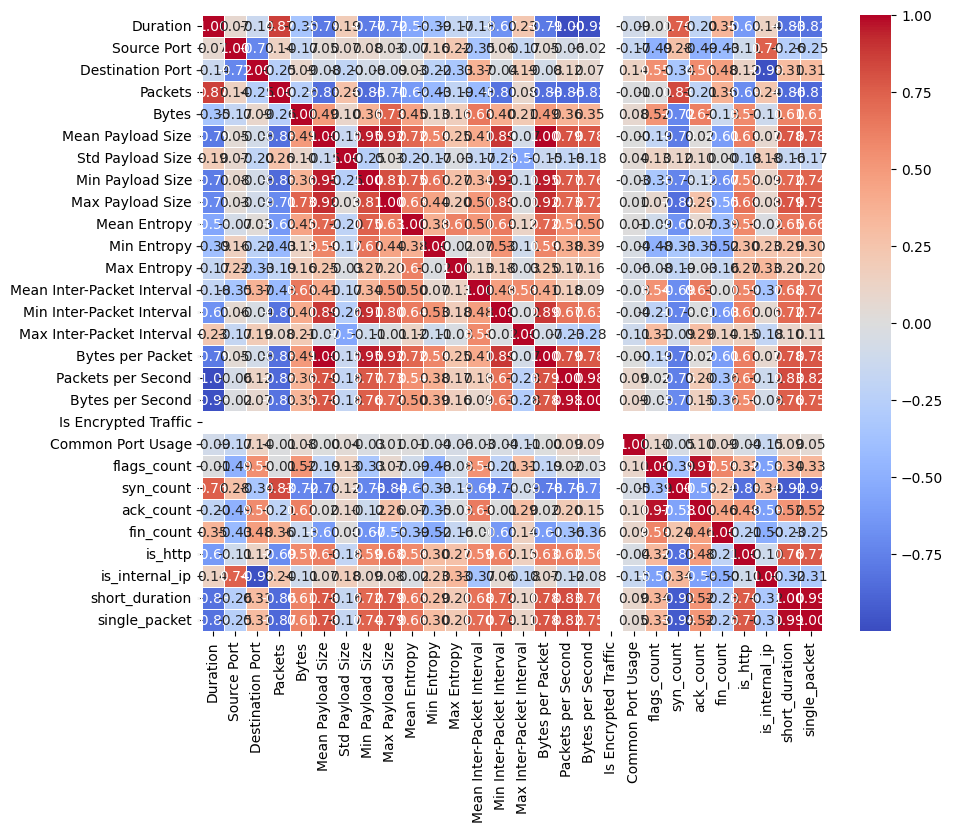

In [5]:
from sklearn.preprocessing import QuantileTransformer

# Create the transformer (default is uniform transformation)
quantile_transformer = QuantileTransformer(
    output_distribution="uniform", random_state=42
)

# Ensure that only numeric columns are transformed
numeric_columns = df.select_dtypes(include=[np.number]).columns
df[numeric_columns] = quantile_transformer.fit_transform(df[numeric_columns])
info.numerical_summary()

## Modeling

### Final Data Prep

In [6]:
def save_as_pickle(path, variable):
    with open(path, "wb") as file:
        pickle.dump(variable, file)

#### Encoding

In [7]:
encoder = LabelEncoder()

# Columns to encode
columns_to_encode = ["Protocol", "Flags", "Label", "direction"]

# Apply label encoding to each column
for column in columns_to_encode:
    # Fit label encoder and return encoded labels
    path = "../../variables/emotet/static_no_pca" + column + "_Encoder.pkl"
    df[column] = encoder.fit_transform(df[column])
    save_as_pickle(path, encoder)

#### Type Casting

In [8]:
df["Bytes"] = df["Bytes"].astype("float64")
df["Duration"] = df["Duration"].astype("float64")
df["Packets"] = df["Packets"].astype("float64")
df["flags_count"] = df["flags_count"].astype("float64")

### Data Splitting

## Models

### Splitting

In [9]:
# Reset the index to convert it to a normal column (if needed)
df_reset = df.reset_index(drop=True)  # This will drop the old index column
X = df_reset.drop("Label", axis=1)  # Now drop the Label
if "index" in X.columns:
    X.drop("index", axis=1, inplace=True)
y = df["Label"]


# Assuming `X` is the feature matrix and `y` is the target variable
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42
)

### KNN

In [10]:
svm_model = SVC(probability=True, random_state=42)

param_grid = {
    "C": [0.1, 1, 10],
    "kernel": ["linear", "rbf", "poly"],
}


grid_svm = GridSearchCV(
    estimator=svm_model,
    param_grid=param_grid,
    scoring="f1",
    cv=5,
    n_jobs=-1,
    verbose=2,
)
grid_svm.fit(X_train, y_train)

# Best parameters
print("Best Parameters for SVM:", grid_svm.best_params_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END .................................C=1, kernel=linear; total time= 1.7min


KeyboardInterrupt: 

## XGB

In [20]:

# Define the model
xgb_model = XGBClassifier(
    use_label_encoder=False, eval_metric="logloss", random_state=42
)

# Define hyperparameter grid
param_grid = {
    "n_estimators": [50, 100, 200],
    "learning_rate": [0.01, 0.1, 0.2],
}

# Perform Grid Search
grid_xgb = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring="f1",
    cv=5,
    n_jobs=-1,
    verbose=2,
)
grid_xgb.fit(X_train, y_train)

# Best parameters
print("Best Parameters for XGBoost:", grid_xgb.best_params_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


/home/yousinator/.cache/pypoetry/virtualenvs/c2-detection-TvTzD0kY-py3.10/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [16:48:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/yousinator/.cache/pypoetry/virtualenvs/c2-detection-TvTzD0kY-py3.10/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [16:48:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/yousinator/.cache/pypoetry/virtualenvs/c2-detection-TvTzD0kY-py3.10/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [16:48:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/yousinator/.cache/pypoetry/virtualenvs/c2-detection-TvTzD0kY-py3.10/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [16:48:02] WARNING: /workspace/src/lea

[CV] END ................learning_rate=0.01, n_estimators=50; total time=   0.8s
[CV] END ................learning_rate=0.01, n_estimators=50; total time=   0.8s
[CV] END ................learning_rate=0.01, n_estimators=50; total time=   0.8s
[CV] END ................learning_rate=0.01, n_estimators=50; total time=   0.8s
[CV] END ................learning_rate=0.01, n_estimators=50; total time=   0.8s
[CV] END .................learning_rate=0.1, n_estimators=50; total time=   0.9s
[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   1.1s
[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   1.2s


/home/yousinator/.cache/pypoetry/virtualenvs/c2-detection-TvTzD0kY-py3.10/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [16:48:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/yousinator/.cache/pypoetry/virtualenvs/c2-detection-TvTzD0kY-py3.10/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [16:48:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/yousinator/.cache/pypoetry/virtualenvs/c2-detection-TvTzD0kY-py3.10/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [16:48:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/yousinator/.cache/pypoetry/virtualenvs/c2-detection-TvTzD0kY-py3.10/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [16:48:03] WARNING: /workspace/src/lea

[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   1.3s
[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   1.3s
[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   1.3s


/home/yousinator/.cache/pypoetry/virtualenvs/c2-detection-TvTzD0kY-py3.10/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [16:48:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/yousinator/.cache/pypoetry/virtualenvs/c2-detection-TvTzD0kY-py3.10/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [16:48:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/yousinator/.cache/pypoetry/virtualenvs/c2-detection-TvTzD0kY-py3.10/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [16:48:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END .................learning_rate=0.1, n_estimators=50; total time=   0.9s
[CV] END .................learning_rate=0.1, n_estimators=50; total time=   0.9s
[CV] END .................learning_rate=0.1, n_estimators=50; total time=   0.8s
[CV] END .................learning_rate=0.1, n_estimators=50; total time=   1.0s


/home/yousinator/.cache/pypoetry/virtualenvs/c2-detection-TvTzD0kY-py3.10/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [16:48:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/yousinator/.cache/pypoetry/virtualenvs/c2-detection-TvTzD0kY-py3.10/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [16:48:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/yousinator/.cache/pypoetry/virtualenvs/c2-detection-TvTzD0kY-py3.10/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [16:48:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/yousinator/.cache/pypoetry/virtualenvs/c2-detection-TvTzD0kY-py3.10/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [16:48:04] WARNING: /workspace/src/lea

[CV] END ................learning_rate=0.1, n_estimators=100; total time=   1.2s
[CV] END ...............learning_rate=0.01, n_estimators=200; total time=   2.1s
[CV] END ...............learning_rate=0.01, n_estimators=200; total time=   2.2s
[CV] END ................learning_rate=0.1, n_estimators=100; total time=   1.2s
[CV] END ................learning_rate=0.1, n_estimators=100; total time=   1.3s
[CV] END ...............learning_rate=0.01, n_estimators=200; total time=   2.2s
[CV] END ...............learning_rate=0.01, n_estimators=200; total time=   2.2s
[CV] END ...............learning_rate=0.01, n_estimators=200; total time=   2.3s


/home/yousinator/.cache/pypoetry/virtualenvs/c2-detection-TvTzD0kY-py3.10/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [16:48:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/yousinator/.cache/pypoetry/virtualenvs/c2-detection-TvTzD0kY-py3.10/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [16:48:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/yousinator/.cache/pypoetry/virtualenvs/c2-detection-TvTzD0kY-py3.10/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [16:48:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/yousinator/.cache/pypoetry/virtualenvs/c2-detection-TvTzD0kY-py3.10/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [16:48:04] WARNING: /workspace/src/lea

[CV] END ................learning_rate=0.1, n_estimators=100; total time=   1.3s
[CV] END ................learning_rate=0.1, n_estimators=100; total time=   1.3s
[CV] END .................learning_rate=0.2, n_estimators=50; total time=   0.8s


/home/yousinator/.cache/pypoetry/virtualenvs/c2-detection-TvTzD0kY-py3.10/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [16:48:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/yousinator/.cache/pypoetry/virtualenvs/c2-detection-TvTzD0kY-py3.10/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [16:48:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/yousinator/.cache/pypoetry/virtualenvs/c2-detection-TvTzD0kY-py3.10/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [16:48:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/yousinator/.cache/pypoetry/virtualenvs/c2-detection-TvTzD0kY-py3.10/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [16:48:04] WARNING: /workspace/src/lea

[CV] END .................learning_rate=0.2, n_estimators=50; total time=   0.9s
[CV] END .................learning_rate=0.2, n_estimators=50; total time=   0.8s
[CV] END .................learning_rate=0.2, n_estimators=50; total time=   0.8s
[CV] END .................learning_rate=0.2, n_estimators=50; total time=   0.8s
[CV] END ................learning_rate=0.1, n_estimators=200; total time=   1.7s
[CV] END ................learning_rate=0.1, n_estimators=200; total time=   1.9s


/home/yousinator/.cache/pypoetry/virtualenvs/c2-detection-TvTzD0kY-py3.10/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [16:48:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/yousinator/.cache/pypoetry/virtualenvs/c2-detection-TvTzD0kY-py3.10/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [16:48:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/yousinator/.cache/pypoetry/virtualenvs/c2-detection-TvTzD0kY-py3.10/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [16:48:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END ................learning_rate=0.2, n_estimators=100; total time=   1.0s
[CV] END ................learning_rate=0.1, n_estimators=200; total time=   1.7s
[CV] END ................learning_rate=0.2, n_estimators=100; total time=   1.1s
[CV] END ................learning_rate=0.2, n_estimators=100; total time=   1.1s
[CV] END ................learning_rate=0.2, n_estimators=100; total time=   1.1s
[CV] END ................learning_rate=0.1, n_estimators=200; total time=   1.8s
[CV] END ................learning_rate=0.1, n_estimators=200; total time=   1.8s
[CV] END ................learning_rate=0.2, n_estimators=100; total time=   1.0s
[CV] END ................learning_rate=0.2, n_estimators=200; total time=   1.2s
[CV] END ................learning_rate=0.2, n_estimators=200; total time=   1.3s
[CV] END ................learning_rate=0.2, n_estimators=200; total time=   1.0s
[CV] END ................learning_rate=0.2, n_estimators=200; total time=   1.0s
[CV] END ................lea

/home/yousinator/.cache/pypoetry/virtualenvs/c2-detection-TvTzD0kY-py3.10/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [16:48:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters for XGBoost: {'learning_rate': 0.1, 'n_estimators': 100}


### Random Forest

In [21]:


rf_model = RandomForestClassifier(random_state=42)

# Define hyperparameter grid
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [10, 20, None],
}

# Perform Grid Search
grid_rf = GridSearchCV(
    estimator=rf_model,
    param_grid=param_grid,
    scoring="f1",
    cv=5,
    n_jobs=-1,
    verbose=2,
)
grid_rf.fit(X_train, y_train)

# Best parameters
print("Best Parameters for Random Forest:", grid_rf.best_params_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ......................max_depth=10, n_estimators=50; total time=   3.2s
[CV] END ......................max_depth=10, n_estimators=50; total time=   3.2s
[CV] END ......................max_depth=10, n_estimators=50; total time=   3.3s
[CV] END ......................max_depth=10, n_estimators=50; total time=   3.4s
[CV] END ......................max_depth=20, n_estimators=50; total time=   3.3s
[CV] END ......................max_depth=10, n_estimators=50; total time=   4.0s
[CV] END ......................max_depth=20, n_estimators=50; total time=   3.2s
[CV] END ......................max_depth=20, n_estimators=50; total time=   3.3s
[CV] END .....................max_depth=10, n_estimators=100; total time=   6.5s
[CV] END ......................max_depth=20, n_estimators=50; total time=   3.4s
[CV] END .....................max_depth=10, n_estimators=100; total time=   6.7s
[CV] END ......................max_depth=20, n_es

### Logistic Regression

In [22]:

# Define the model
log_reg_model = LogisticRegression(solver="liblinear", random_state=42)

# Define hyperparameter grid
param_grid = {
    "penalty": ["l1", "l2"],
    "C": [0.01, 0.1, 1, 10],
}

# Perform Grid Search
grid_log_reg = GridSearchCV(
    estimator=log_reg_model,
    param_grid=param_grid,
    scoring="f1",
    cv=5,
    n_jobs=-1,
    verbose=2,
)
grid_log_reg.fit(X_train, y_train)

# Best parameters
print("Best Parameters for Logistic Regression:", grid_log_reg.best_params_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END .................................C=0.01, penalty=l2; total time=   1.9s
[CV] END .................................C=0.01, penalty=l2; total time=   2.1s
[CV] END .................................C=0.01, penalty=l2; total time=   2.2s
[CV] END .................................C=0.01, penalty=l1; total time=   2.3s
[CV] END .................................C=0.01, penalty=l1; total time=   2.5s
[CV] END .................................C=0.01, penalty=l2; total time=   2.6s
[CV] END .................................C=0.01, penalty=l1; total time=   2.7s
[CV] END .................................C=0.01, penalty=l2; total time=   2.7s
[CV] END .................................C=0.01, penalty=l1; total time=   3.0s
[CV] END ..................................C=0.1, penalty=l2; total time=   3.4s
[CV] END .................................C=0.01, penalty=l1; total time=   5.0s
[CV] END ..................................C=0.1,

/home/yousinator/.cache/pypoetry/virtualenvs/c2-detection-TvTzD0kY-py3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END ...................................C=10, penalty=l1; total time= 1.9min


/home/yousinator/.cache/pypoetry/virtualenvs/c2-detection-TvTzD0kY-py3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV] END ...................................C=10, penalty=l1; total time= 2.0min
[CV] END ...................................C=10, penalty=l1; total time= 2.0min
Best Parameters for Logistic Regression: {'C': 1, 'penalty': 'l1'}


### Model Evaluation

In [29]:


# Create a function for evaluation
def evaluate_model(model, X_val, y_val, X_test, y_test, model_name):
    y_val_pred = model.predict(X_val)
    y_test_pred = model.predict(X_test)

    # Log metrics
    val_metrics = classification_report(y_val, y_val_pred, output_dict=True)
    test_metrics = classification_report(y_test, y_test_pred, output_dict=True)
    roc_auc_val = roc_auc_score(y_val, model.predict_proba(X_val)[:, 1])
    roc_auc_test = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

    # Log with MLflow
    with mlflow.start_run(run_name=model_name):
        mlflow.log_params(model.get_params())
        mlflow.log_metric("Accuracy_Validation", val_metrics["accuracy"])
        mlflow.log_metric("Precision_Validation", val_metrics["1"]["precision"])
        mlflow.log_metric("Recall_Validation", val_metrics["1"]["recall"])
        mlflow.log_metric("F1-Score Validation", val_metrics["1"]["f1-score"])
        mlflow.log_metric("ROC-AUC Validation", roc_auc_val)

        mlflow.log_metric("Accuracy_Test", test_metrics["accuracy"])
        mlflow.log_metric("Precision_Test", test_metrics["1"]["precision"])
        mlflow.log_metric("Recall_Test", test_metrics["1"]["recall"])
        mlflow.log_metric("F1-Score_Test", test_metrics["1"]["f1-score"])
        mlflow.log_metric("ROC-AUC_Test", roc_auc_test)

        mlflow.sklearn.log_model(model, f"{model_name}_model")

    # Print metrics
    print(f"Validation Metrics for {model_name}:")
    print(classification_report(y_val, y_val_pred))
    print(f"ROC-AUC (Validation): {roc_auc_val}\n")

    print(f"Test Metrics for {model_name}:")
    print(classification_report(y_test, y_test_pred))
    print(f"ROC-AUC (Test): {roc_auc_test}\n")

In [31]:
evaluate_model(
    grid_log_reg.best_estimator_, X_val, y_val, X_test, y_test, "Logistic Regression"
)
evaluate_model(grid_svm.best_estimator_, X_val, y_val, X_test, y_test, "SVM")
evaluate_model(grid_xgb.best_estimator_, X_val, y_val, X_test, y_test, "XGBoost")
evaluate_model(grid_rf.best_estimator_, X_val, y_val, X_test, y_test, "Random Forest")

2025/01/15 17:00:46 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Validation Metrics for Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6436
           1       1.00      1.00      1.00      5511

    accuracy                           1.00     11947
   macro avg       1.00      1.00      1.00     11947
weighted avg       1.00      1.00      1.00     11947

ROC-AUC (Validation): 0.9992921101691752

Test Metrics for Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6436
           1       1.00      1.00      1.00      5511

    accuracy                           1.00     11947
   macro avg       1.00      1.00      1.00     11947
weighted avg       1.00      1.00      1.00     11947

ROC-AUC (Test): 0.9986659541530533



2025/01/15 17:00:51 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Validation Metrics for SVM:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6436
           1       1.00      1.00      1.00      5511

    accuracy                           1.00     11947
   macro avg       1.00      1.00      1.00     11947
weighted avg       1.00      1.00      1.00     11947

ROC-AUC (Validation): 0.9990450761283243

Test Metrics for SVM:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6436
           1       1.00      1.00      1.00      5511

    accuracy                           1.00     11947
   macro avg       1.00      1.00      1.00     11947
weighted avg       1.00      1.00      1.00     11947

ROC-AUC (Test): 0.9991160681067381



2025/01/15 17:00:53 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Validation Metrics for XGBoost:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6436
           1       1.00      1.00      1.00      5511

    accuracy                           1.00     11947
   macro avg       1.00      1.00      1.00     11947
weighted avg       1.00      1.00      1.00     11947

ROC-AUC (Validation): 1.0

Test Metrics for XGBoost:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6436
           1       1.00      1.00      1.00      5511

    accuracy                           1.00     11947
   macro avg       1.00      1.00      1.00     11947
weighted avg       1.00      1.00      1.00     11947

ROC-AUC (Test): 1.0



2025/01/15 17:00:55 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Validation Metrics for Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6436
           1       1.00      1.00      1.00      5511

    accuracy                           1.00     11947
   macro avg       1.00      1.00      1.00     11947
weighted avg       1.00      1.00      1.00     11947

ROC-AUC (Validation): 1.0

Test Metrics for Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6436
           1       1.00      1.00      1.00      5511

    accuracy                           1.00     11947
   macro avg       1.00      1.00      1.00     11947
weighted avg       1.00      1.00      1.00     11947

ROC-AUC (Test): 1.0



In [30]:
mlflow.end_run()

## Validation

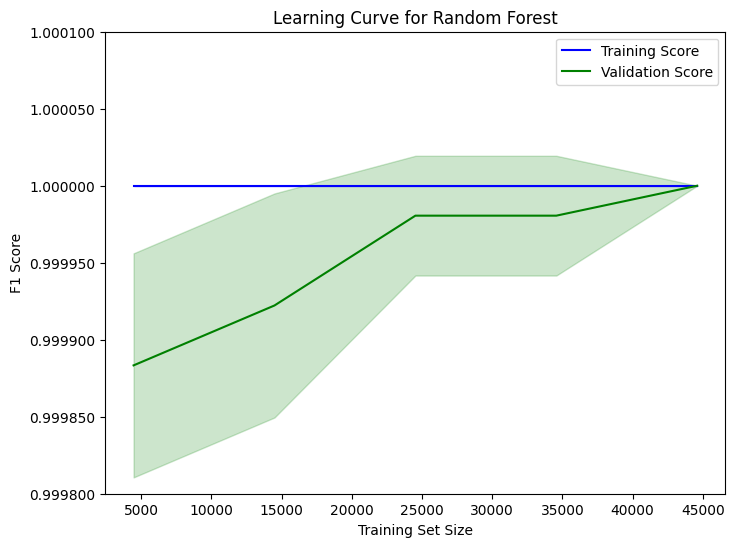

In [41]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

train_sizes, train_scores, val_scores = learning_curve(
    grid_rf.best_estimator_, X_train, y_train, cv=5, scoring="f1", n_jobs=-1
)

# Calculate means and standard deviations
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot
import matplotlib.ticker as mticker

# Plot
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label="Training Score", color="blue")
plt.fill_between(
    train_sizes, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.2
)
plt.plot(train_sizes, val_mean, label="Validation Score", color="green")
plt.fill_between(
    train_sizes, val_mean - val_std, val_mean + val_std, color="green", alpha=0.2
)
plt.title("Learning Curve for Random Forest")
plt.xlabel("Training Set Size")
plt.ylabel("F1 Score")
plt.legend()

# Adjust y-axis to focus on the small variations
plt.ylim(0.9998, 1.0001)  # Set limits to highlight small changes
plt.gca().yaxis.set_major_formatter(
    mticker.FormatStrFormatter("%.6f")
)  # Show six decimals

plt.show()

In [40]:
print("Train Mean:", train_mean)
print("Validation Mean:", val_mean)

Train Mean: [1. 1. 1. 1. 1.]
Validation Mean: [0.99988334 0.99992224 0.99998056 0.99998056 1.        ]


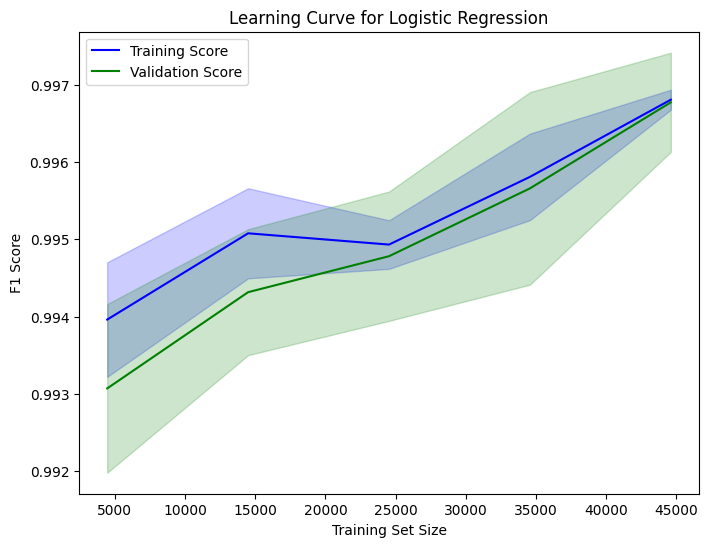

In [33]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

train_sizes, train_scores, val_scores = learning_curve(
    grid_log_reg.best_estimator_, X_train, y_train, cv=5, scoring="f1", n_jobs=-1
)

# Calculate means and standard deviations
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label="Training Score", color="blue")
plt.fill_between(
    train_sizes, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.2
)
plt.plot(train_sizes, val_mean, label="Validation Score", color="green")
plt.fill_between(
    train_sizes, val_mean - val_std, val_mean + val_std, color="green", alpha=0.2
)
plt.title("Learning Curve for Logistic Regression")
plt.xlabel("Training Set Size")
plt.ylabel("F1 Score")
plt.legend()
plt.show()

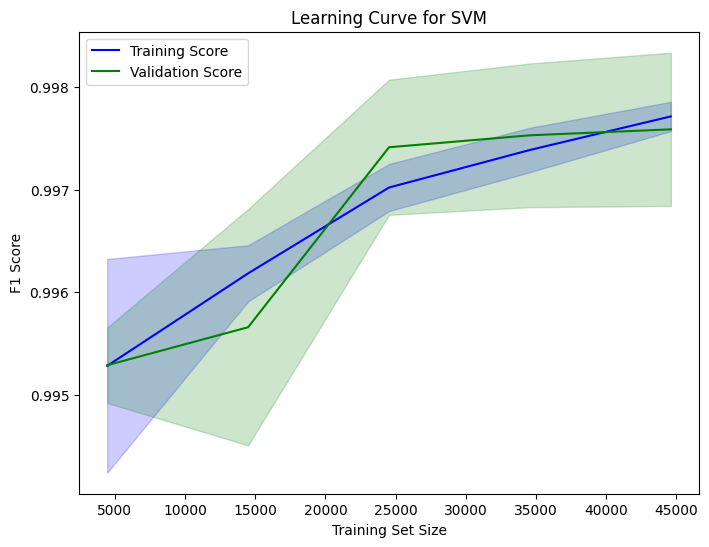

In [34]:
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

train_sizes, train_scores, val_scores = learning_curve(
    grid_svm.best_estimator_, X_train, y_train, cv=5, scoring="f1", n_jobs=-1
)

# Calculate means and standard deviations
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label="Training Score", color="blue")
plt.fill_between(
    train_sizes, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.2
)
plt.plot(train_sizes, val_mean, label="Validation Score", color="green")
plt.fill_between(
    train_sizes, val_mean - val_std, val_mean + val_std, color="green", alpha=0.2
)
plt.title("Learning Curve for SVM")
plt.xlabel("Training Set Size")
plt.ylabel("F1 Score")
plt.legend()
plt.show()

/home/yousinator/.cache/pypoetry/virtualenvs/c2-detection-TvTzD0kY-py3.10/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:03:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/yousinator/.cache/pypoetry/virtualenvs/c2-detection-TvTzD0kY-py3.10/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:03:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/yousinator/.cache/pypoetry/virtualenvs/c2-detection-TvTzD0kY-py3.10/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:03:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/yousinator/.cache/pypoetry/virtualenvs/c2-detection-TvTzD0kY-py3.10/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [17:03:52] WARNING: /workspace/src/lea

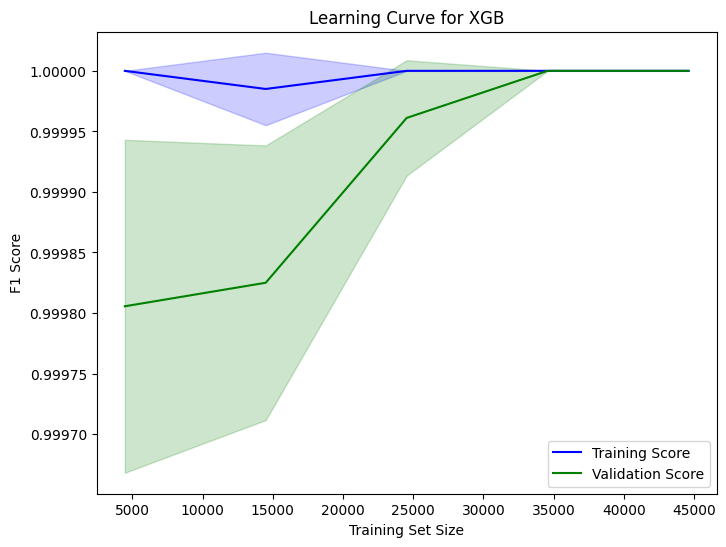

In [35]:
train_sizes, train_scores, val_scores = learning_curve(
    grid_xgb.best_estimator_, X_train, y_train, cv=5, scoring="f1", n_jobs=-1
)

# Calculate means and standard deviations
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, label="Training Score", color="blue")
plt.fill_between(
    train_sizes, train_mean - train_std, train_mean + train_std, color="blue", alpha=0.2
)
plt.plot(train_sizes, val_mean, label="Validation Score", color="green")
plt.fill_between(
    train_sizes, val_mean - val_std, val_mean + val_std, color="green", alpha=0.2
)
plt.title("Learning Curve for XGB")
plt.xlabel("Training Set Size")
plt.ylabel("F1 Score")
plt.legend()
plt.show()